# PI-MACHINE LEARNING

#### Consingna  : 
Implementar un modelo que nos permita predecir si un envío llegará a tiempo o no, según la información contenida en el dataset E-Commerce_test.

In [2]:
#Importamos algunas librerias que utilizaremos (mas adelante importare algunas mas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creo mi dataframe llamado "data"

In [3]:
data = pd.read_excel("E-Commerce_train.xlsx")

In [4]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


## Empezamos con el Preprocesamiento de datos

In [5]:
#Buscamos si tenemos instancias duplicadas. Esto lo hacemos de la siguiente manera.
data[data.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [6]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 0


#### 1. Revisemos  los valores faltantes,

    No tenemos valores faltantes pero lo hare esta vez  para cumplir la consigna.

In [7]:
#pip install missingno 

import missingno as msno

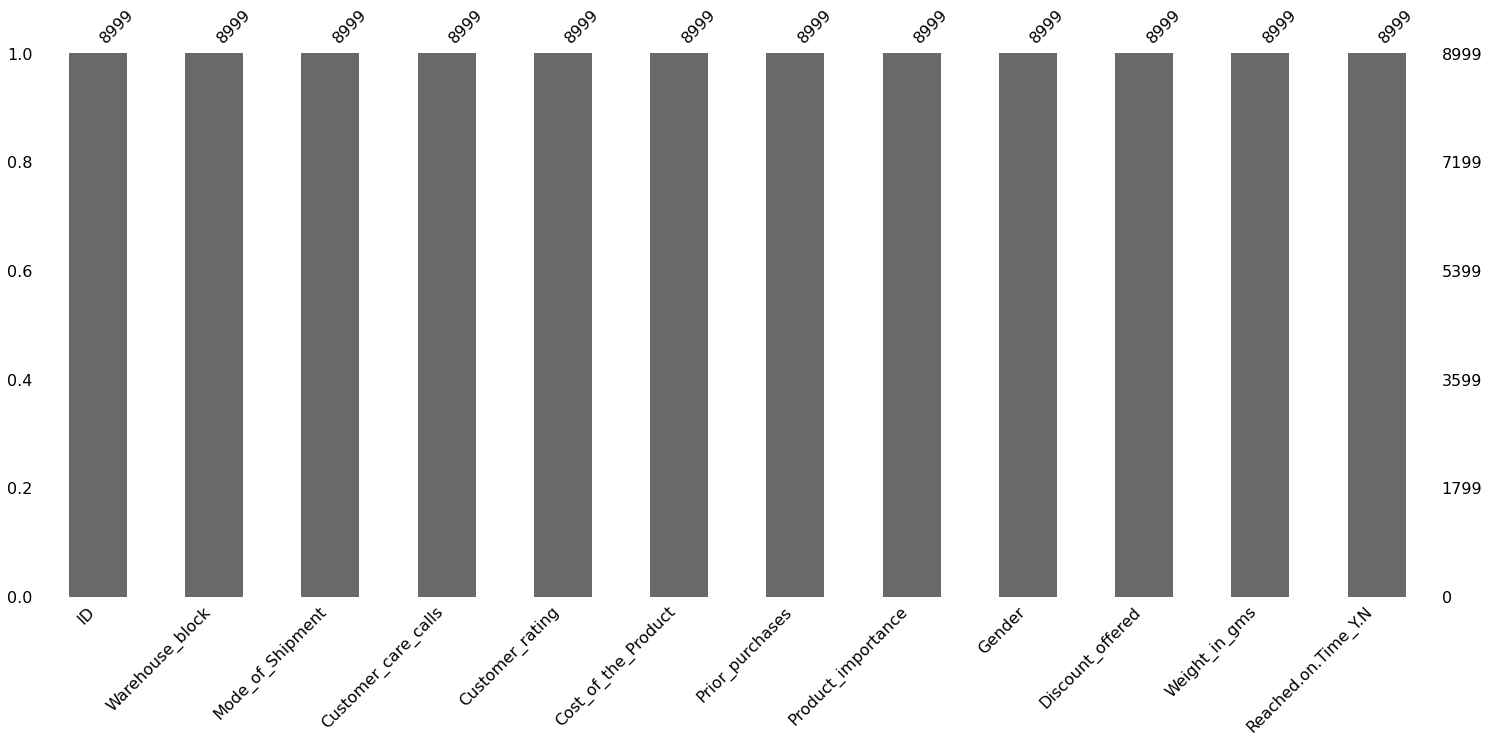

In [8]:
msno.bar(data)
plt.show()

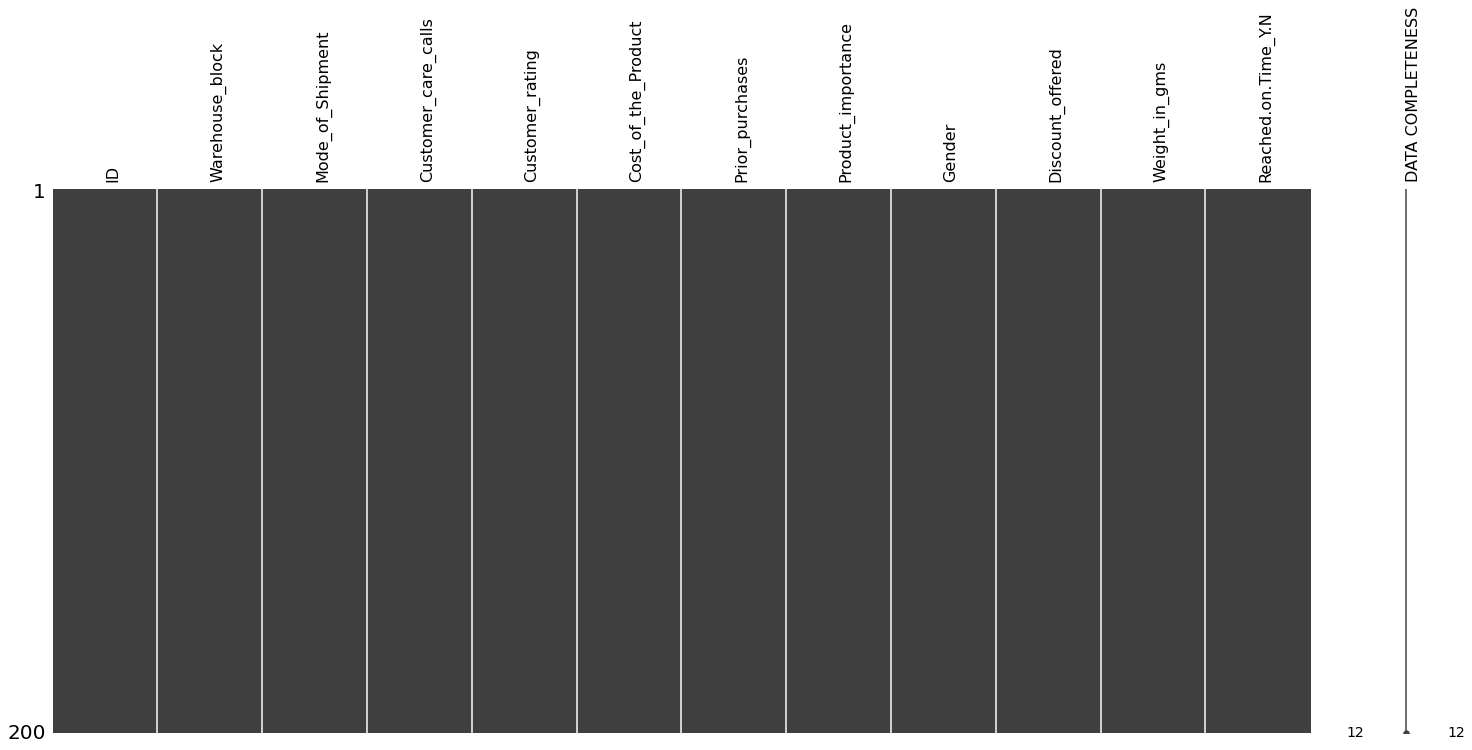

In [9]:
# Tomamos 200 muestras al azar de nuestra población

msno.matrix(data.sample(200), labels = True, label_rotation = 90)
plt.show()

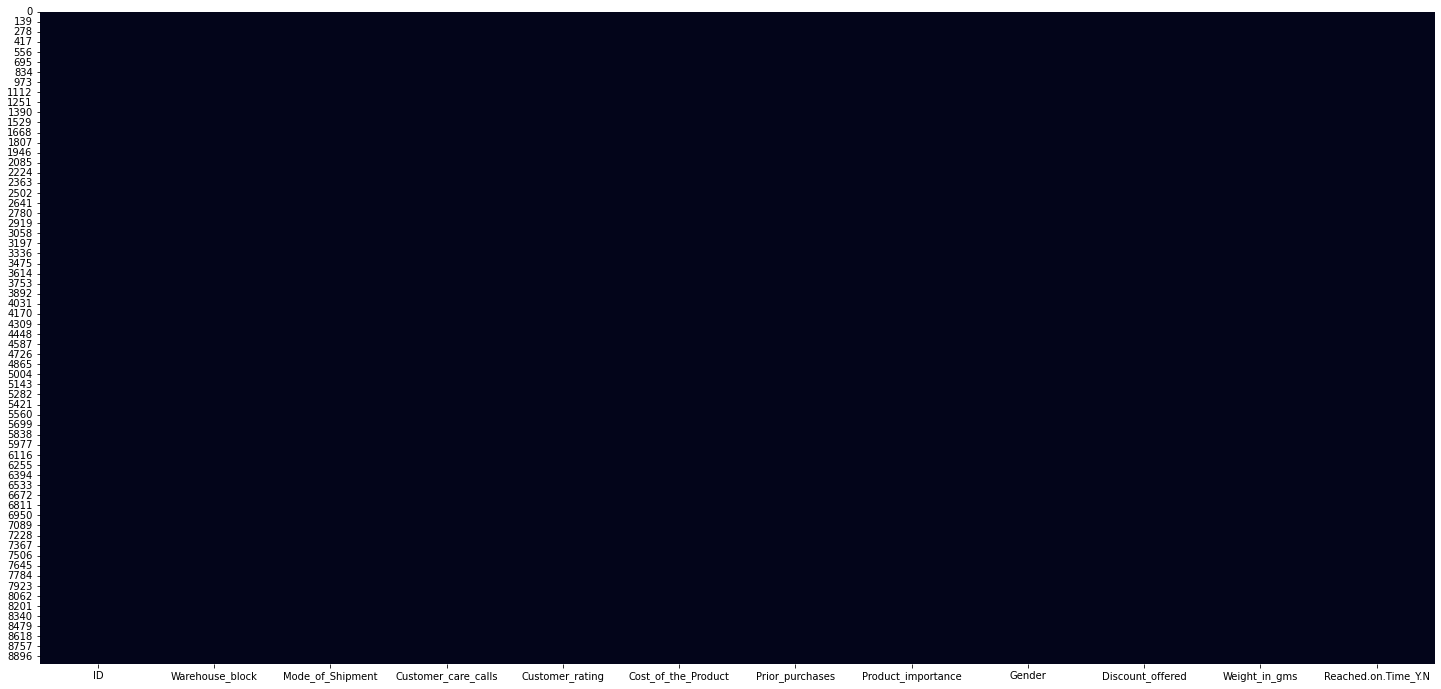

In [10]:
# Otra forma de visualizar la matriz con seaborn

plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

No definimos la estrategia que usaremos para la imputación. En este caso, por que no lo necesitamos

Ahora identificaremos valores atípicos y apliquemos una técnica para su tratamiento a cada columna nominal.

C o s t _ o f _ t h e _ P r o d u c t

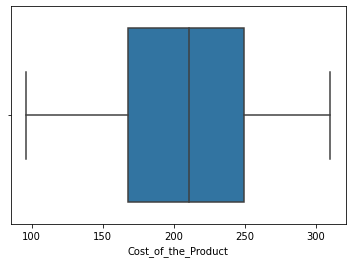

In [11]:
sns.boxplot(x = 'Cost_of_the_Product', data = data)
plt.show()

El diagrama de cajas nos permite identificar fácilmente, y de forma visual, si tenemos outliers.

In [12]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.Cost_of_the_Product.min()

96

C u s t o m e r _ c a r e _ c a l l s

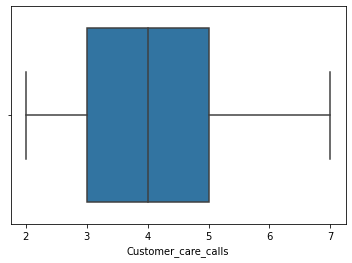

In [13]:
sns.boxplot(x = 'Customer_care_calls', data = data)
plt.show()

In [14]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.Customer_care_calls.min()

2

# C u s t o m e r _ r a t i n g

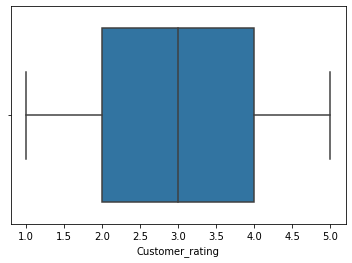

In [15]:
sns.boxplot(x = 'Customer_rating', data = data)
plt.show()

In [16]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.Customer_rating.min()

1

# W e i g h t _ i n _ g m s 

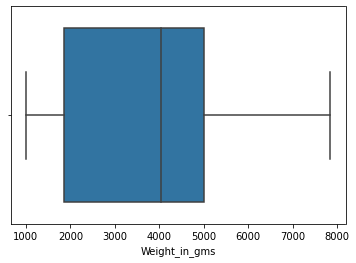

In [17]:
sns.boxplot(x = 'Weight_in_gms', data = data)
plt.show()

In [18]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.Weight_in_gms.min()

1001

# D i s c o u n t _ o f f e r e d

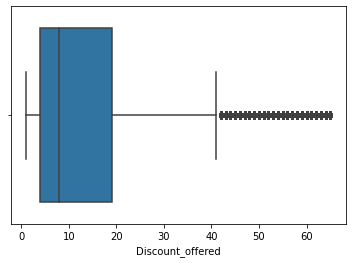

In [19]:
sns.boxplot(x = 'Discount_offered', data = data)
plt.show()

Aqui encontramos muchos outliers

In [20]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.Discount_offered.min()

1

Utilizaremos la técnica del rango intercuartílico para decidir si eliminar los  outliers en Discount_offered.

In [21]:
Q1 = data['Discount_offered'].quantile(0.25)
Q3 = data['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

4.0
19.0
15.0
-18.5
41.5


In [22]:
print('Cantidad de registros totales:', data.shape[0])
print('Cantidad de outliers:', data[(data['Discount_offered']<BI) | (data['Discount_offered']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 1193


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello, recurrimos al siguiente bloque de código

In [23]:
out_Discount_offered = (data['Discount_offered']<BI) | (data['Discount_offered']>BS) 

data = data[~out_Discount_offered]

In [24]:
print('Tamaño del dataset, luego de eliminar outliers en Discount_offered:', data.shape[0])

Tamaño del dataset, luego de eliminar outliers en Discount_offered: 7806


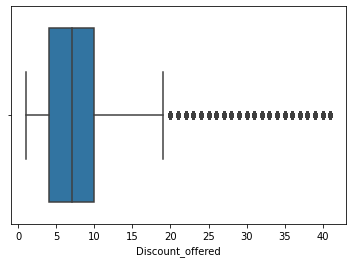

In [25]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente

sns.boxplot(x = 'Discount_offered', data = data)
plt.show()

Iteramos nuevamente para disminuir aun mas los outliers

In [26]:
Q1 = data['Discount_offered'].quantile(0.25)
Q3 = data['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

4.0
10.0
6.0
-5.0
19.0


In [27]:
out_Discount_offered = (data['Discount_offered']<BI) | (data['Discount_offered']>BS) 

data = data[~out_Discount_offered]

In [28]:
print('Tamaño del dataset, luego de eliminar por segunda vez outliers en Discount_offered:', data.shape[0])

Tamaño del dataset, luego de eliminar por segunda vez outliers en Discount_offered: 6790


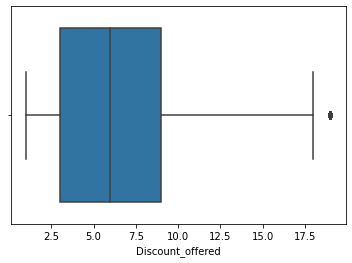

In [29]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente

sns.boxplot(x = 'Discount_offered', data = data)
plt.show()

Estos nuevos outliers parecen ser muy pocos. Queda en consideración del data scientist si seguir eliminando o con una iteracion por mi parte para ser solo dos pruebas  ya fue suficiente.

# P r i o r _ p u r c h a s e s 

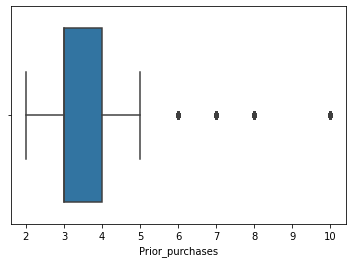

In [30]:
sns.boxplot(x = 'Prior_purchases', data = data)
plt.show()

In [31]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.Prior_purchases.min()

2

Utilizaremos la técnica del rango intercuartílico para decidir si  eliminar outliers en Prior_purchases.

In [32]:
Q1 = data['Prior_purchases'].quantile(0.25)
Q3 = data['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

3.0
4.0
1.0
1.5
5.5


In [33]:
print('Cantidad de registros totales:', data.shape[0])
print('Cantidad de outliers:', data[(data['Prior_purchases']<BI) | (data['Prior_purchases']>BS)].shape[0] )

Cantidad de registros totales: 6790
Cantidad de outliers: 614


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello, recurrimos al siguiente bloque de código

In [34]:
out_Prior_purchases = (data['Prior_purchases']<BI) | (data['Prior_purchases']>BS) 

data = data[~out_Prior_purchases]

In [35]:
print('Tamaño del dataset, luego de eliminar outliers en Prior_purchases:', data.shape[0])

Tamaño del dataset, luego de eliminar outliers en Prior_purchases: 6176


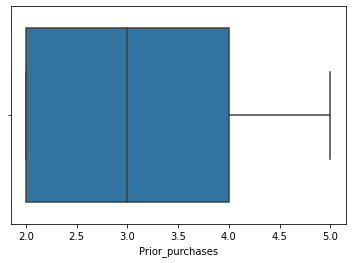

In [36]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente

sns.boxplot(x = 'Prior_purchases', data = data)
plt.show()

Estos nuevos outliers parecen ser nulos a la vista. Queda en consideración del data scientist si seguir eliminando o con una iteracion por mi parte para ser solo una prueba  ya fue suficiente.

#### Escalado/normalización (Para este método, usamos MinMaxScaler de Scikit-learn)

 Escalamos todas las variables numericas

In [37]:
# importamos StandarScaler

from sklearn.preprocessing import StandardScaler

# D i s c o u n t _ o f f e r e d

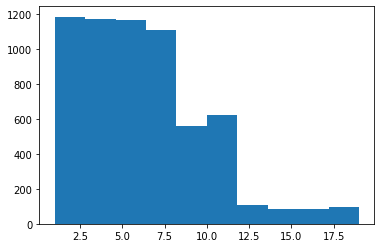

In [38]:
# Trabajaremos con la variable Discount_offered. Veamos su distribución

plt.hist(data['Discount_offered']) 
plt.show()

In [39]:
# Escalamos Discount_offered

scaler = StandardScaler()

scaler.fit(data[['Discount_offered']])

data['Discount_offered'] = scaler.transform(data[['Discount_offered']])

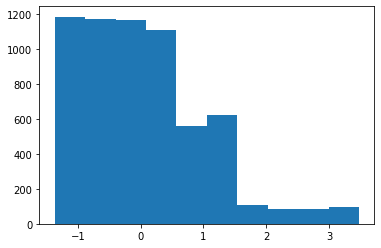

In [40]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['Discount_offered']) 
plt.show()

# P r i o r _ p u r c h a s e s

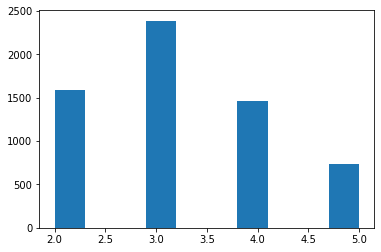

In [41]:
# Trabajaremos con la variable Prior_purchases. Veamos su distribución

plt.hist(data['Prior_purchases']) 
plt.show()

In [42]:
# Escalamos Prior_purchases

scaler = StandardScaler()

scaler.fit(data[['Prior_purchases']])

data["Prior_purchases"] = scaler.transform(data[['Prior_purchases']])

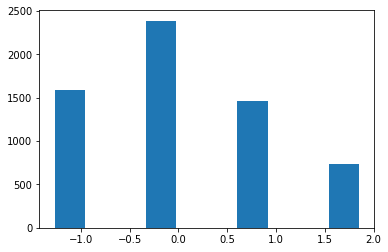

In [43]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['Prior_purchases']) 
plt.show()

In [ ]:
C o s t _ o f _ t h e _ P r o d u c t

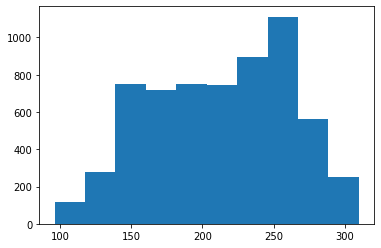

In [44]:
# Trabajaremos con la variable Cost_of_the_Product. Veamos su distribución

plt.hist(data['Cost_of_the_Product']) 
plt.show()

In [45]:
# Escalamos Cost_of_the_Product

scaler = StandardScaler()

scaler.fit(data[['Cost_of_the_Product']])

data["Cost_of_the_Product"] = scaler.transform(data[['Cost_of_the_Product']])

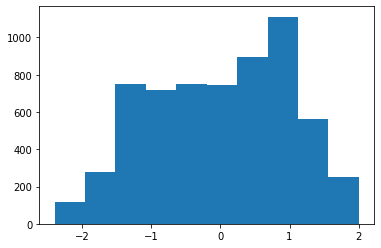

In [46]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['Cost_of_the_Product']) 
plt.show()

C u s t o m e r _ c a r e _ c a l l s

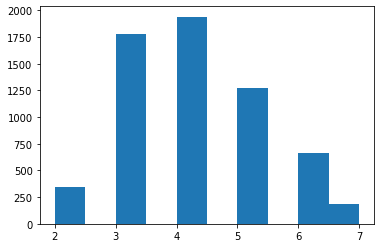

In [47]:
# Trabajaremos con la variable Customer_care_calls. Veamos su distribución

plt.hist(data['Customer_care_calls']) 
plt.show()

In [48]:
# Escalamos Customer_care_calls

scaler = StandardScaler()

scaler.fit(data[['Customer_care_calls']])

data["Customer_care_calls"] = scaler.transform(data[['Customer_care_calls']])

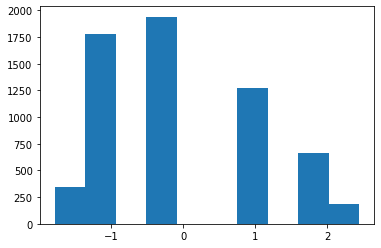

In [49]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['Customer_care_calls']) 
plt.show()

C u s t o m e r _ r a t i n g

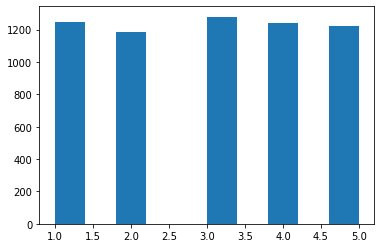

In [50]:
# Trabajaremos con la variable Customer_rating. Veamos su distribución

plt.hist(data['Customer_rating']) 
plt.show()

In [51]:
# Escalamos Customer_rating

scaler = StandardScaler()

scaler.fit(data[['Customer_rating']])

data["CCustomer_rating"] = scaler.transform(data[['Customer_rating']])

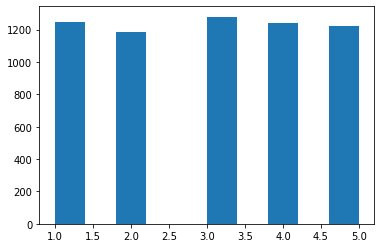

In [52]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['Customer_rating']) 
plt.show()

W e i g h t _ i n _ g m s

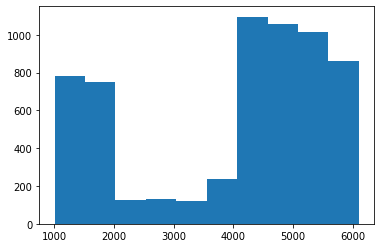

In [53]:
# Trabajaremos con la variable Weight_in_gms. Veamos su distribución

plt.hist(data['Weight_in_gms']) 
plt.show()

In [54]:
# Escalamos Weight_in_gms

scaler = StandardScaler()

scaler.fit(data[['Weight_in_gms']])

data["Weight_in_gms"] = scaler.transform(data[['Weight_in_gms']])

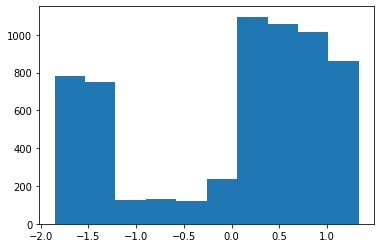

In [55]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['Weight_in_gms']) 
plt.show()

#### Codificación de variables categóricas
Veamos la aplicación de Label Encoder para alguna variable ordinal de nuestro dataset, One Hot Encoder o crearemos variables dummy para codificar una variable nominal.

Para las variables nominales generaremos variables dummy.

In [ ]:
#Columnas con variables nominales
Gender,Warehouse_block

Para las variables nominales,podemos usar la clase Label Encoder

In [ ]:
#Columnas con variables ordinales
Mode_of_Shipment,Product_importance

# W a r e h o u s e _ b l o c k

In [57]:
# Trabajaremos con la variable Warehouse_block generando variables dummy
Warehouse_block_dummy=pd.get_dummies(data["Warehouse_block"],prefix="Warehouse_block")

In [58]:
data=pd.concat([data,Warehouse_block_dummy],axis=1)

In [59]:
data.drop(columns="Warehouse_block",inplace=True)

In [60]:
data

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,CCustomer_rating,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
3,4,Flight,-0.937701,3,-0.755493,0.811368,medium,M,1.055817,-1.744383,1,-0.000574,0,1,0,0,0
5,6,Flight,-0.937701,1,-1.043894,-0.228692,medium,F,1.594520,-1.594343,1,-1.418293,0,0,0,0,1
6,7,Flight,-0.937701,4,0.768909,-0.228692,low,F,-0.829642,-0.997933,1,0.708286,0,0,0,1,0
8,9,Flight,-0.937701,4,-1.291094,-0.228692,low,F,1.325168,-1.316768,1,0.708286,1,0,0,0,0
10,11,Flight,-0.937701,4,-0.487693,-1.268752,medium,M,1.594520,-0.674721,1,0.708286,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,Ship,-0.937701,1,0.089108,-0.228692,low,F,-1.368345,0.131119,1,-1.418293,0,0,0,1,0
8995,8996,Ship,0.754902,3,0.398108,-0.228692,medium,M,-0.829642,0.349303,0,-0.000574,0,0,0,0,1
8996,8997,Ship,-0.091400,5,0.974909,-0.228692,medium,F,-0.021588,0.158627,0,1.417145,1,0,0,0,0
8997,8998,Ship,-0.091400,2,-0.590693,-0.228692,medium,F,-0.290940,1.227663,1,-0.709433,0,1,0,0,0


# G e n d e r

In [61]:
# Trabajaremos con la variable Gender generando variables dummy
gender_dummy=pd.get_dummies(data["Gender"],prefix="Gender")

In [62]:
data=pd.concat([data,gender_dummy],axis=1)

In [63]:
data.drop(columns="Gender",inplace=True)

In [64]:
data

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,CCustomer_rating,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,4,Flight,-0.937701,3,-0.755493,0.811368,medium,1.055817,-1.744383,1,-0.000574,0,1,0,0,0,0,1
5,6,Flight,-0.937701,1,-1.043894,-0.228692,medium,1.594520,-1.594343,1,-1.418293,0,0,0,0,1,1,0
6,7,Flight,-0.937701,4,0.768909,-0.228692,low,-0.829642,-0.997933,1,0.708286,0,0,0,1,0,1,0
8,9,Flight,-0.937701,4,-1.291094,-0.228692,low,1.325168,-1.316768,1,0.708286,1,0,0,0,0,1,0
10,11,Flight,-0.937701,4,-0.487693,-1.268752,medium,1.594520,-0.674721,1,0.708286,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,Ship,-0.937701,1,0.089108,-0.228692,low,-1.368345,0.131119,1,-1.418293,0,0,0,1,0,1,0
8995,8996,Ship,0.754902,3,0.398108,-0.228692,medium,-0.829642,0.349303,0,-0.000574,0,0,0,0,1,0,1
8996,8997,Ship,-0.091400,5,0.974909,-0.228692,medium,-0.021588,0.158627,0,1.417145,1,0,0,0,0,1,0
8997,8998,Ship,-0.091400,2,-0.590693,-0.228692,medium,-0.290940,1.227663,1,-0.709433,0,1,0,0,0,1,0


# P r o d u c t _ i m p o r t a n c e

In [66]:
# Trabajaremos con la variable street para Label Encoder

data.Product_importance.unique()

array(['medium', 'low', 'high'], dtype=object)

In [67]:
data.Product_importance.value_counts()

low       3066
medium    2601
high       509
Name: Product_importance, dtype: int64

In [68]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])

In [69]:
data['Product_importance'].value_counts()

1    3066
2    2601
0     509
Name: Product_importance, dtype: int64

In [70]:
# Observamos cómo cambió todos los valores por 0 y 1

data['Product_importance']

3       2
5       2
6       1
8       1
10      2
       ..
8994    1
8995    2
8996    2
8997    2
8998    1
Name: Product_importance, Length: 6176, dtype: int32

# M o d e _ o f _ S h i p m e n t

In [71]:
# Trabajaremos con la variable street para Label Encoder

data.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [72]:
data.Mode_of_Shipment.value_counts()

Ship      4205
Flight    1000
Road       971
Name: Mode_of_Shipment, dtype: int64

In [73]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

data['Mode_of_Shipment'] = label_encoder.fit_transform(data['Mode_of_Shipment'])

In [74]:
data['Mode_of_Shipment'].value_counts()

2    4205
0    1000
1     971
Name: Mode_of_Shipment, dtype: int64

In [75]:
# Observamos cómo cambió todos los valores por 0 y 1

data['Mode_of_Shipment']

3       0
5       0
6       0
8       0
10      0
       ..
8994    2
8995    2
8996    2
8997    2
8998    2
Name: Mode_of_Shipment, Length: 6176, dtype: int32

# Despues de la codificacion de variables nominales y ordinales

In [76]:
data

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,CCustomer_rating,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,4,0,-0.937701,3,-0.755493,0.811368,2,1.055817,-1.744383,1,-0.000574,0,1,0,0,0,0,1
5,6,0,-0.937701,1,-1.043894,-0.228692,2,1.594520,-1.594343,1,-1.418293,0,0,0,0,1,1,0
6,7,0,-0.937701,4,0.768909,-0.228692,1,-0.829642,-0.997933,1,0.708286,0,0,0,1,0,1,0
8,9,0,-0.937701,4,-1.291094,-0.228692,1,1.325168,-1.316768,1,0.708286,1,0,0,0,0,1,0
10,11,0,-0.937701,4,-0.487693,-1.268752,2,1.594520,-0.674721,1,0.708286,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,2,-0.937701,1,0.089108,-0.228692,1,-1.368345,0.131119,1,-1.418293,0,0,0,1,0,1,0
8995,8996,2,0.754902,3,0.398108,-0.228692,2,-0.829642,0.349303,0,-0.000574,0,0,0,0,1,0,1
8996,8997,2,-0.091400,5,0.974909,-0.228692,2,-0.021588,0.158627,0,1.417145,1,0,0,0,0,1,0
8997,8998,2,-0.091400,2,-0.590693,-0.228692,2,-0.290940,1.227663,1,-0.709433,0,1,0,0,0,1,0


# Correlacion de variables

Visualizamos las variables con mas relacion mediante el mapa de calor con la libreria seaborn.

In [77]:
import seaborn as sn

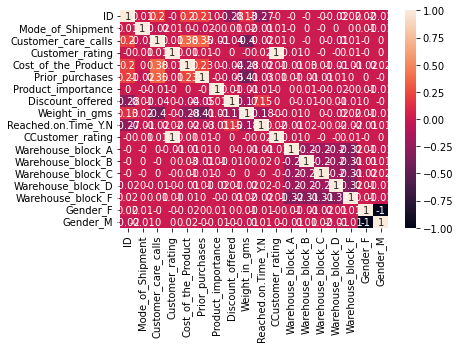

In [81]:
cordata=data.corr().round(2)
sn.heatmap(cordata,annot=True)
plt.show()

#### Aqui un poco mas grande usando la libreria  matplotlib 

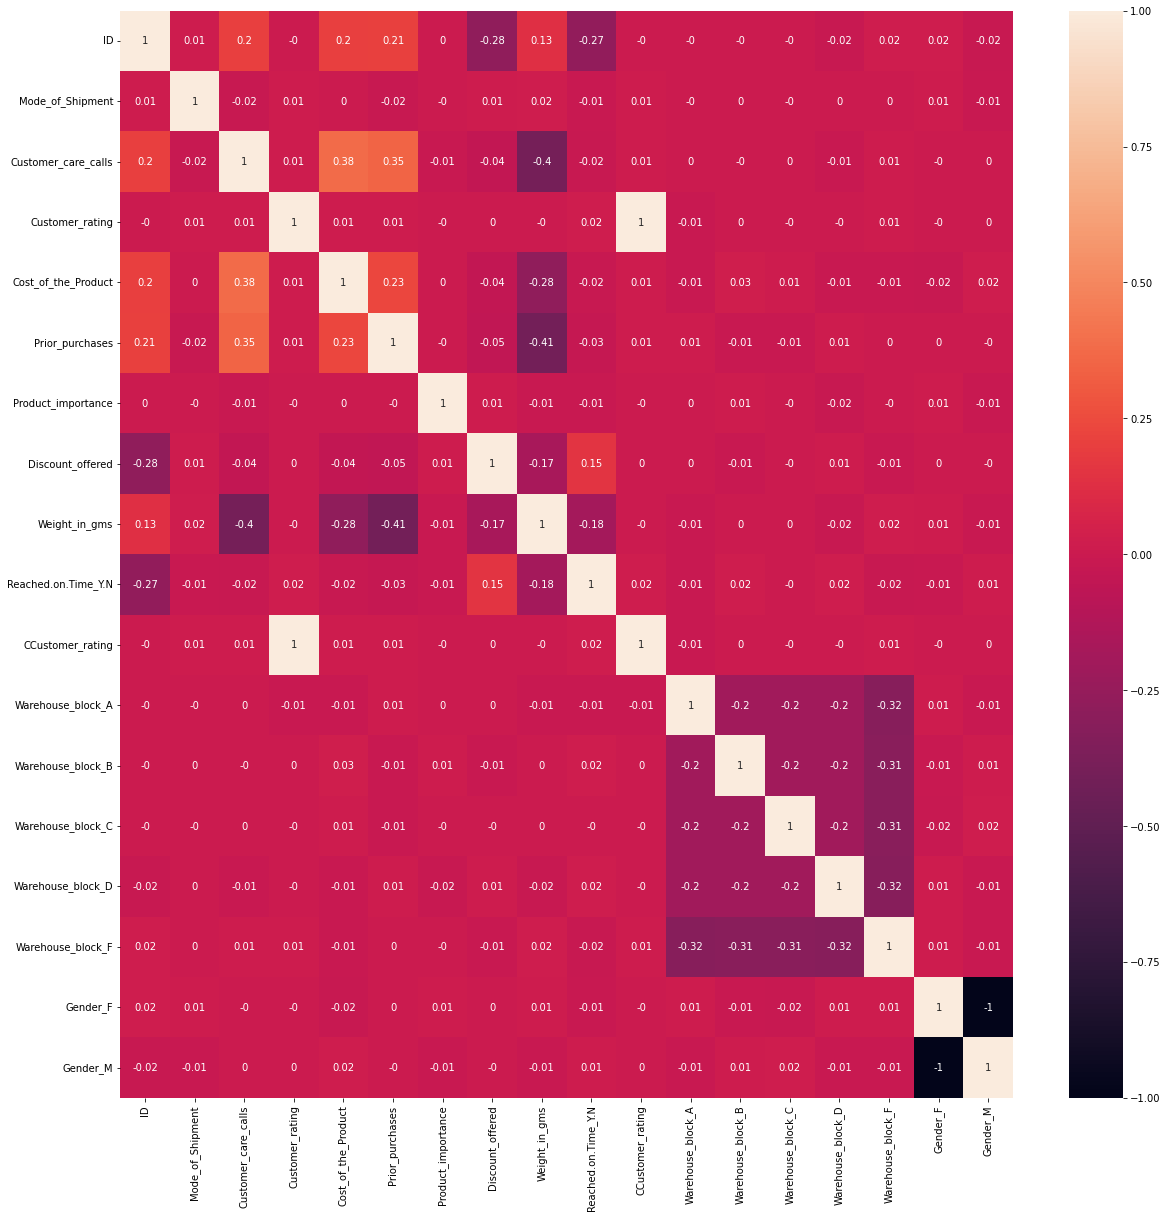

In [82]:
fig,ax=plt.subplots(figsize=(20,20))
sn.heatmap(cordata,annot=True)
plt.show()

# Usare Random Forest para mi modelo predictorio

## Simulamos Random Forest generando muestreos

### Paso 1

In [84]:
#imprimo un muestro usando 2/3 de los datos
print(data.sample(frac=2/3))

        ID  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
5373  5374                 2            -0.937701                3   
3827  3828                 1            -0.937701                3   
8028  8029                 2             2.447506                1   
8771  8772                 0             0.754902                4   
8219  8220                 0            -0.091400                5   
...    ...               ...                  ...              ...   
7180  7181                 2             2.447506                5   
5201  5202                 0            -0.937701                1   
1821  1822                 2            -0.091400                4   
8496  8497                 0            -1.784003                1   
5119  5120                 2            -0.937701                5   

      Cost_of_the_Product  Prior_purchases  Product_importance  \
5373             0.851309        -1.268752                   2   
3827            -0.631893  

### simulacion  + bootstrap
replace=True simularia el bootstrap

In [85]:
print(data.sample(frac=2/3,replace=True))

        ID  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
6715  6716                 0             1.601204                4   
5758  5759                 0             0.754902                1   
4795  4796                 0             1.601204                4   
3141  3142                 1             1.601204                2   
8498  8499                 0             0.754902                4   
...    ...               ...                  ...              ...   
5754  5755                 0             1.601204                4   
7952  7953                 0             1.601204                5   
7828  7829                 2            -0.937701                4   
4486  4487                 2            -0.937701                4   
5286  5287                 2            -0.937701                5   

      Cost_of_the_Product  Prior_purchases  Product_importance  \
6715             0.171508         1.851428                   2   
5758             1.531109  

### Creo un nuevo Df sin los ID y los resultados 

In [237]:
data2=data.drop(["Reached.on.Time_Y.N","ID"],axis=1)

In [238]:
data2

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,CCustomer_rating,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
3,0,-0.937701,3,-0.755493,0.811368,2,1.055817,-1.744383,-0.000574,0,1,0,0,0,0,1
5,0,-0.937701,1,-1.043894,-0.228692,2,1.594520,-1.594343,-1.418293,0,0,0,0,1,1,0
6,0,-0.937701,4,0.768909,-0.228692,1,-0.829642,-0.997933,0.708286,0,0,0,1,0,1,0
8,0,-0.937701,4,-1.291094,-0.228692,1,1.325168,-1.316768,0.708286,1,0,0,0,0,1,0
10,0,-0.937701,4,-0.487693,-1.268752,2,1.594520,-0.674721,0.708286,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2,-0.937701,1,0.089108,-0.228692,1,-1.368345,0.131119,-1.418293,0,0,0,1,0,1,0
8995,2,0.754902,3,0.398108,-0.228692,2,-0.829642,0.349303,-0.000574,0,0,0,0,1,0,1
8996,2,-0.091400,5,0.974909,-0.228692,2,-0.021588,0.158627,1.417145,1,0,0,0,0,1,0
8997,2,-0.091400,2,-0.590693,-0.228692,2,-0.290940,1.227663,-0.709433,0,1,0,0,0,1,0


# Creación de Bosque Aleatorio(Random Forest)

In [ ]:
#Importamos RandomForestClassifier para crear  Random Forest
from random import sample
from sklearn.ensemble import RandomForestClassifier

In [239]:
Forest = RandomForestClassifier(n_estimators=15,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True)
Forest.fit(data2.values, data["Reached.on.Time_Y.N"].values)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_samples=0.6666666666666666, n_estimators=15,
                       oob_score=True)

#### Compruebo la precisión con los datos  que quedaron fuera de la bolsa(oob)  

Datos que no se usaron para entrenar 1/3 de los totales

In [240]:
print(Forest.oob_score_)

0.5788536269430051


#### Compruebo la precisión con el mismo df esperando obtener 100%

In [241]:
print(Forest.score(data2.values,data["Reached.on.Time_Y.N"].values))

0.9669689119170984


Un pequeño experimento con valores aleatorios

In [243]:
print(Forest.predict([[1.601204,4,0.171508,1.851428,2, 0.517114,0.339925,1,0.708286,0,0,0,0,1,0,1 ]]))

[1]


Ahora predice los resultados para el dataframe "data 2"

In [244]:
print(Forest.predict(data2[data2.columns[:]]))

[1 1 1 ... 0 1 0]


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Usaremos el archivo E-Commerce_test para predecir sus resultados

#### Haremos el Preprocesamiento de datos (sin detalles)

In [206]:
# Primero revisamos el archivo
test = pd.read_excel("E-Commerce_test.xlsx")

In [207]:
#Eliminamos la columna ID
test.drop("ID",axis=1,inplace=True)

In [208]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,F,Ship,5,1,189,2,medium,M,10,5248
1,D,Ship,5,3,150,2,high,F,9,4446
2,F,Ship,3,3,200,3,low,M,3,5739
3,A,Ship,5,1,133,2,medium,M,1,4643
4,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...
1995,A,Ship,4,1,252,5,medium,F,1,1538
1996,B,Ship,4,1,232,5,medium,F,6,1247
1997,C,Ship,5,4,242,5,low,F,4,1155
1998,F,Ship,5,2,223,6,medium,M,2,1210


#### Dejare los outliers por que en la consigna piden 2000 resultados

In [209]:
#Buscamos si tenemos instancias duplicadas. Esto lo hacemos de la siguiente manera.
test[test.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms


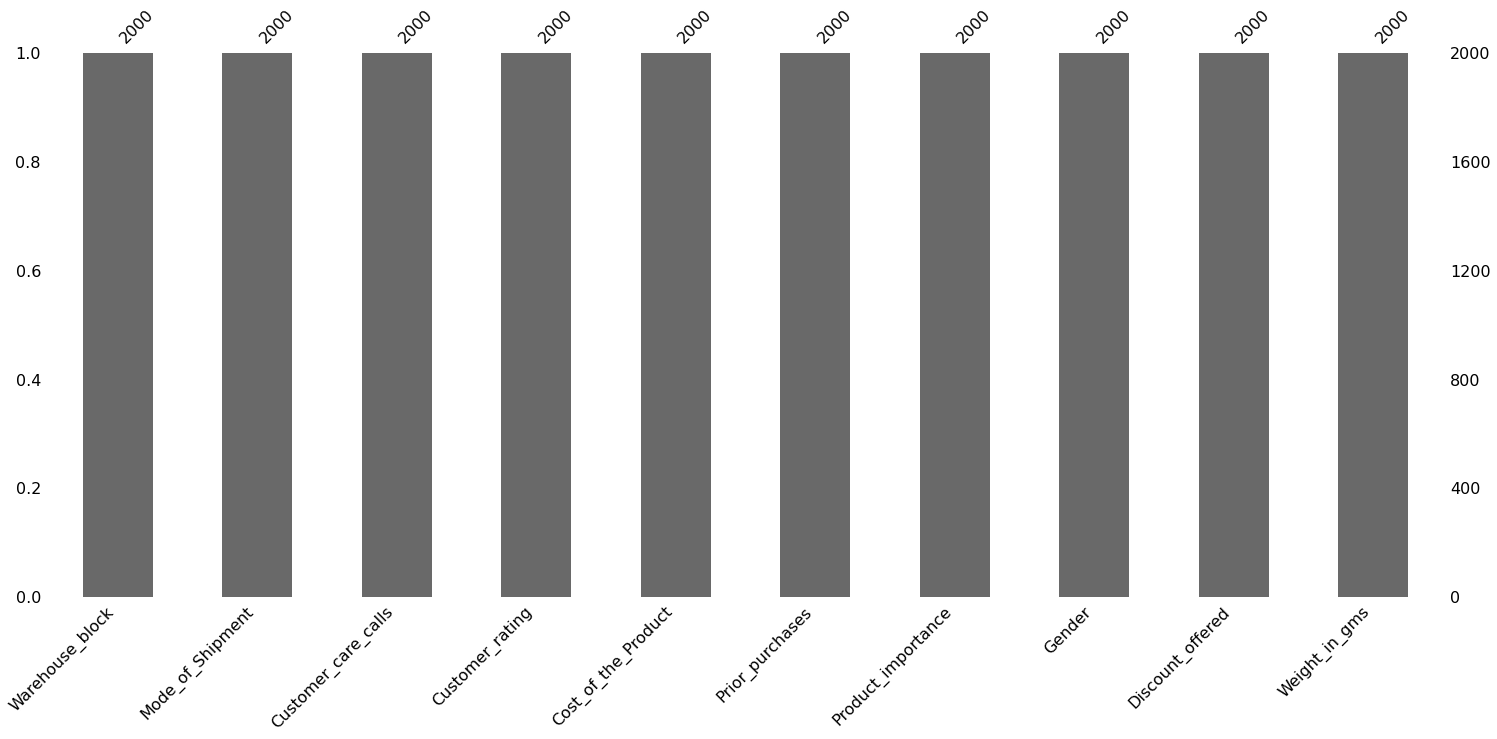

In [189]:
#Reviso si hay valores faltantes
msno.bar(test)
plt.show()

#### Escalado/normalización (Para este método, usamos MinMaxScaler de Scikit-learn)

######  Lo usamos para transformar todos los valores en el rango entre (0 a 1)

In [210]:
# Escalamos Discount_offered(test)

scaler = StandardScaler()

scaler.fit(test[['Discount_offered']])

test['Discount_offered'] = scaler.transform(test[['Discount_offered']])

In [211]:
# Escalamos Prior_purchases(test)

scaler = StandardScaler()

scaler.fit(test[['Prior_purchases']])

test["Prior_purchases"] = scaler.transform(test[['Prior_purchases']])

In [212]:
# Escalamos Cost_of_the_Product(test)

scaler = StandardScaler()

scaler.fit(test[['Cost_of_the_Product']])

test["Cost_of_the_Product"] = scaler.transform(test[['Cost_of_the_Product']])

In [213]:
# Escalamos Customer_care_calls(test)

scaler = StandardScaler()

scaler.fit(test[['Customer_care_calls']])

test["Customer_care_calls"] = scaler.transform(test[['Customer_care_calls']])

In [214]:
# Escalamos Customer_rating(test)

scaler = StandardScaler()

scaler.fit(test[['Customer_rating']])

test["CCustomer_rating"] = scaler.transform(test[['Customer_rating']])

In [215]:
# Escalamos Weight_in_gms(test)

scaler = StandardScaler()

scaler.fit(test[['Weight_in_gms']])

test["Weight_in_gms"] = scaler.transform(test[['Weight_in_gms']])

In [216]:
#revisamos el resultado
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,CCustomer_rating
0,F,Ship,0.676389,1,-0.616410,-1.251576,medium,M,1.510350,0.814459,-1.392091
1,D,Ship,0.676389,3,-1.458294,-1.251576,high,F,1.165993,0.344728,0.020841
2,F,Ship,-1.083894,3,-0.378956,-0.563897,low,M,-0.900149,1.102038,0.020841
3,A,Ship,0.676389,1,-1.825269,-1.251576,medium,M,-1.588863,0.460111,-1.392091
4,B,Ship,-0.203753,2,0.916250,-0.563897,low,M,-0.555792,0.964399,-0.685625
...,...,...,...,...,...,...,...,...,...,...,...
1995,A,Ship,-0.203753,1,0.743556,0.811461,medium,F,-1.588863,-1.358489,-1.392091
1996,B,Ship,-0.203753,1,0.311821,0.811461,medium,F,0.132922,-1.528928,-1.392091
1997,C,Ship,0.676389,4,0.527688,0.811461,low,F,-0.555792,-1.582812,0.727307
1998,F,Ship,0.676389,2,0.117540,1.499141,medium,M,-1.244506,-1.550599,-0.685625


#### Codificación de variables categóricas

###### Warehouse_block

In [217]:
# Trabajaremos con la variable Warehouse_block generando variables dummy
Warehouse_block_dummy=pd.get_dummies(test["Warehouse_block"],prefix="Warehouse_block")

In [218]:
test=pd.concat([test,Warehouse_block_dummy],axis=1)

In [219]:
test.drop(columns="Warehouse_block",inplace=True)

###### Gender

In [220]:
# Trabajaremos con la variable Gender generando variables dummy
Gender_dummy=pd.get_dummies(test["Gender"],prefix="Gender")

In [221]:
test=pd.concat([test,Gender_dummy],axis=1)

In [222]:
test.drop(columns="Gender",inplace=True)

###### Product_importance

In [227]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

test['Product_importance'] = label_encoder.fit_transform(test['Product_importance'])

###### Mode_of_Shipment

In [228]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

test['Mode_of_Shipment'] = label_encoder.fit_transform(test['Mode_of_Shipment'])

# Predecimos los resultados de test

In [245]:
print(Forest.predict(test[test.columns[:]]))

[1 0 0 ... 1 1 1]


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Creo un df con los resultados como lo pide la consigna

###### Creo una lista con los resultados para posteriormente guardarlo en un df

In [246]:
Lista=(Forest.predict(test[test.columns[:]]))

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [247]:
print(Lista)

[1 0 0 ... 1 1 1]


In [250]:
Brakions=pd.DataFrame()

In [253]:
Brakions["pred"]=Lista

In [262]:
Brakions.set_index("pred",inplace=True)

## Finalmente creo un archivo csv con el df 

In [266]:
Brakions.to_csv("Brakions2.csv")

In [264]:
Brakions.head()

""
pred
1
0
0
0
1


In [267]:
Brakions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 1
Empty DataFrame